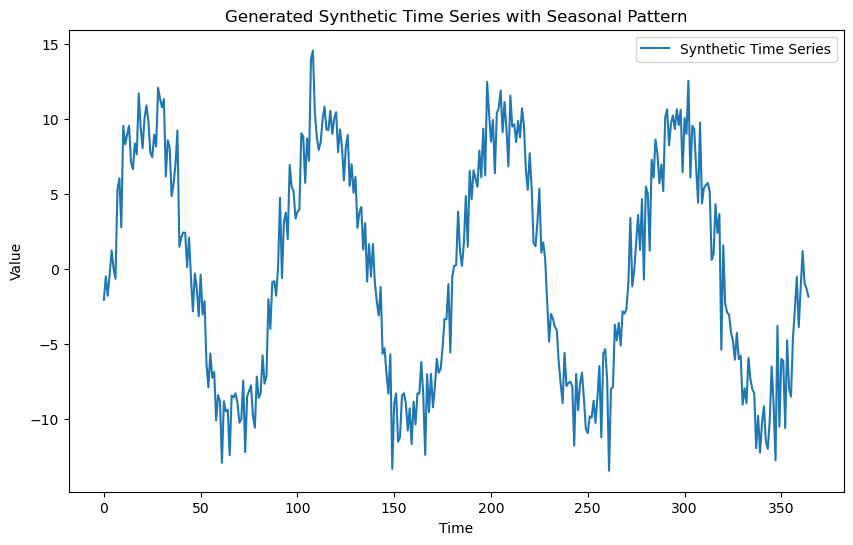

(   Time     Value
 0     0 -2.030039
 1     1 -0.470689
 2     2 -1.759425
 3     3 -0.328539
 4     4  1.262208,
 (365, 2))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a synthetic time series with a seasonal pattern
np.random.seed(1022)  # For reproducibility, birthday

# Parameters
time_points = 365  # One year of data, one data point per day
period = 365 // 4  # Quarterly seasonality
amplitude = 10  # Seasonal amplitude
noise_level = 2  # Noise amplitude

# Generate the time series
time = np.arange(time_points)
base_series = amplitude * np.sin(2 * np.pi * time / period)
noise = noise_level * np.random.randn(time_points)
series = base_series + noise

# Convert to a pandas DataFrame for convenience
df = pd.DataFrame(data={'Time': time, 'Value': series})

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Value'], label='Synthetic Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Generated Synthetic Time Series with Seasonal Pattern')
plt.legend()
plt.show()

df.head(), df.shape


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional, Dense
from sklearn.metrics import mean_squared_error

# Function to create a dataset for RNN
def create_dataset(series, n_input, n_features=1,):
    generator = TimeseriesGenerator(series, series, length=n_input, batch_size=len(series))
    for x, y in generator:
        return x, y

# Define sequence length
n_input = 14  # Use last 14 days to predict the next day
n_features = 1  # Univariate time series

# Prepare the dataset
X, y = create_dataset(df['Value'].values, n_input, n_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features] which is required for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# Define a function to build and train models
def build_and_train_model(model_type):
    # Define the model
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
    elif model_type == 'GRU':
        model.add(GRU(50, activation='relu', input_shape=(n_input, n_features)))
    elif model_type == 'Bidirectional':
        model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_input, n_features)))
    elif model_type == 'DeepRNN':
        model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
        model.add(SimpleRNN(50, activation='relu'))
    
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # Train the model
    model.fit(X_train, y_train, epochs=100, verbose=0)
    
    # Predict and evaluate
    predictions = model.predict(X_test, verbose=0)
    mse = mean_squared_error(y_test, predictions)
    return mse

# Test different architectures
models = ['LSTM', 'GRU', 'Bidirectional', 'DeepRNN']
results = {model: build_and_train_model(model) for model in models}

results

C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


{'LSTM': 4.995013894164933,
 'GRU': 4.978408222301523,
 'Bidirectional': 5.57990666818424,
 'DeepRNN': 7.286471915456665}

In [8]:
#increaseing size
data = df['Value'].values
for i in range(2,5):
    print("Datasize:",i,"times")
    X, y = create_dataset(np.concatenate([data, data]), n_input, n_features)
    print("Size:",len(X))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = ['LSTM', 'GRU', 'Bidirectional', 'DeepRNN']
    results = {model: build_and_train_model(model) for model in models}
    
    print(results)

Datasize: 2 times
Size: 716


C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


{'LSTM': 4.644570565796879, 'GRU': 4.5140460599858026, 'Bidirectional': 3.458446967996163, 'DeepRNN': 3.3935228609704966}
Datasize: 3 times
Size: 716


C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim`

{'LSTM': 4.184150926579004, 'GRU': 4.171284414533859, 'Bidirectional': 4.333923589822764, 'DeepRNN': 1.9771135993907296}
Datasize: 4 times
Size: 716


C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\docto\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim`

{'LSTM': 4.913853347337575, 'GRU': 3.5087859322336956, 'Bidirectional': 3.9103749735294873, 'DeepRNN': 3.158414352895397}
